<a href="https://colab.research.google.com/github/OrnellaFanais/LinuxDay2021/blob/main/Analisi_Comandi_Environment_pybullet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ambiente PyBullet
https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit#heading=h.2ye70wns7io3

# Physics simulation for robotics

In [ ]:
%%time
!pip install pybullet
!pip install numpngw
#show video
!apt-get install -y xvfb python-opengl ffmpeg 
!pip install ffmpeg-python

     |████████████████████████████████| 102.2MB 41kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 21 not upgraded.
Need to get 1,280 kB of archives.
After this operation, 7,682 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.7 [783 kB]
Fetched 1,280 kB in 0s (10.8 MB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Selecting previously unselected package xvfb.

In [ ]:
import time 
import os
import pybullet as p
import pybullet_data as pd

p.connect(p.DIRECT)
p.setAdditionalSearchPath(pd.getDataPath())
planeID = p.loadURDF("plane.urdf")
os.system("git clone https://github.com/ros-industrial/kuka_experimental.git")
#robot = p.loadURDF("kuka_iiwa/model_free_base.urdf")
robot = p.loadURDF("kuka_experimental/kuka_lbr_iiwa_support/urdf/lbr_iiwa_14_r820.urdf")

In [ ]:
p.getNumJoints(robot)

9

In [ ]:
number_of_joints = p.getNumJoints(robot)
for joint_number in range(number_of_joints):
  info = p.getJointInfo(robot, joint_number)
  print(info)

(0, b'joint_a1', 0, 7, 6, 1, 0.0, 0.0, -2.9668, 2.9668, 0.0, 1.4834, b'link_1', (0.0, 0.0, 1.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), -1)
(1, b'joint_a2', 0, 8, 7, 1, 0.0, 0.0, -2.0942, 2.0942, 0.0, 1.4834, b'link_2', (0.0, 1.0, 0.0), (-0.00043624, 0.0, 0.36), (0.0, 0.0, 0.0, 1.0), 0)
(2, b'joint_a3', 0, 9, 8, 1, 0.0, 0.0, -2.9668, 2.9668, 0.0, 1.7452, b'link_3', (0.0, 0.0, 1.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), 1)
(3, b'joint_a4', 0, 10, 9, 1, 0.0, 0.0, -2.0942, 2.0942, 0.0, 1.3089, b'link_4', (0.0, -1.0, 0.0), (0.00043624, 0.0, 0.42), (0.0, 0.0, 0.0, 1.0), 2)
(4, b'joint_a5', 0, 11, 10, 1, 0.0, 0.0, -2.9668, 2.9668, 0.0, 2.2688, b'link_5', (0.0, 0.0, 1.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), 3)
(5, b'joint_a6', 0, 12, 11, 1, 0.0, 0.0, -2.0942, 2.0942, 0.0, 2.356, b'link_6', (0.0, 1.0, 0.0), (0.0, 0.0, 0.4), (0.0, 0.0, 0.0, 1.0), 4)
(6, b'joint_a7', 0, 13, 12, 1, 0.0, 0.0, -3.0541, 3.0541, 0.0, 2.356, b'link_7', (0.0, 0.0, 1.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), 5)
(7,

In [ ]:
position, orientation = p.getBasePositionAndOrientation(robot)
position

(0.0, 0.0, 0.0)

In [ ]:
orientation

(0.0, 0.0, 0.0, 1.0)

In [ ]:
joint_positions = [j[0] for j in p.getJointStates(robot, range(9))]
joint_positions

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
world_position, world_orientation = p.getLinkState(robot, 2)[:2]
world_position

(-0.00043624, 0.0, 0.36)

In [ ]:
p.setGravity(0, 0, -9.81)

This comand move all seven joint at 0.2 radiants

In [ ]:
p.setJointMotorControlArray(robot,range(7),p.POSITION_CONTROL, targetPositions = [0.2]*7)

In [ ]:
p.setRealTimeSimulation(0) #no realtime simulation

In [ ]:
import cv2
from PIL import Image
import ffmpeg
import numpy as np
import random
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

In [ ]:
pixelWidth = 640
pixelHeight = 360
viewMatrix = p.computeViewMatrixFromYawPitchRoll(cameraTargetPosition=[0,0,0], 
                                                 distance=4.0, 
                                                 yaw=60.0, 
                                                 pitch=-10.0, 
                                                 roll=0.0, 
                                                 upAxisIndex=2)
projectionMatrix = p.computeProjectionMatrixFOV(fov=60, 
                                                aspect=pixelWidth / pixelHeight, 
                                                nearVal=0.01, 
                                                farVal=100)

In [ ]:
frame = 0
for _ in range(100): #10000
  p.stepSimulation()
  time.sleep(1./240)
  if _ % 10 == 0:
      _, _, img, _, _ = p.getCameraImage(pixelWidth, pixelHeight, viewMatrix,projectionMatrix, shadow=1, lightDirection=[1,1,1])
      Image.fromarray(img[:, :, :3]).save('./frame%04d.jpg' % frame)
      frame += 1
ffmpeg.input('./frame*.jpg', pattern_type='glob', framerate=30).output('./output.gif').overwrite_output().run()    

(None, None)


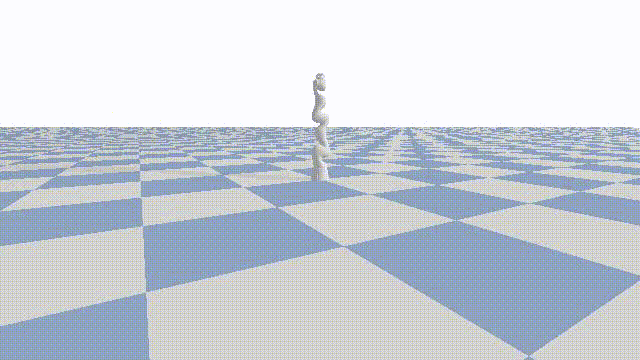

In [ ]:
def show_gif_image(filename):
  video = io.open(filename, 'r+b').read()
  encoded = base64.b64encode(video)
  ipythondisplay.display(HTML(data='''<img src="data:image/gif;base64,{0}"/>'''.format(encoded.decode('ascii'))))

ffmpeg.input('./frame*.jpg', pattern_type='glob', framerate=240.0/10).output('./output.gif').overwrite_output().run()
show_gif_image('./output.gif')

In [ ]:
p.resetSimulation()
planeID = p.loadURDF("plane.urdf")
robot = p.loadURDF("kuka_experimental/kuka_lbr_iiwa_support/urdf/lbr_iiwa_14_r820.urdf", [0,0,0], useFixedBase = 1)
p.setGravity(0, 0, -9.81)
p.setRealTimeSimulation(0) #no realtime simulation
p.setJointMotorControlArray(robot,range(7),p.POSITION_CONTROL, targetPositions = [1.5]*7)

In [ ]:
frame = 0
for _ in range(300): #10000
  p.stepSimulation()
  time.sleep(1./10.)
  if _ % 10 == 0:
      _, _, img, _, _ = p.getCameraImage(pixelWidth, pixelHeight, viewMatrix,projectionMatrix, shadow=1, lightDirection=[1,1,1])
      Image.fromarray(img[:, :, :3]).save('./frame%04d.jpg' % frame)
      frame += 1
ffmpeg.input('./frame*.jpg', pattern_type='glob', framerate=30).output('./output.gif').overwrite_output().run()    

(None, None)


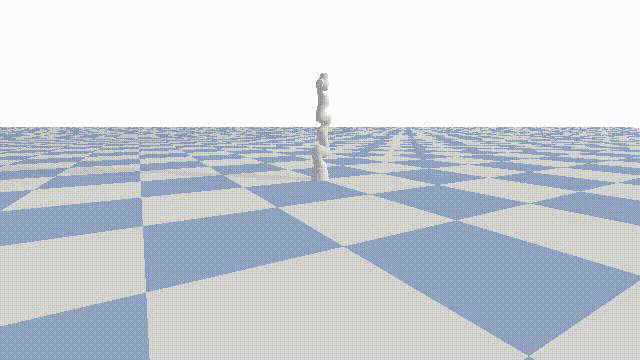

In [ ]:
show_gif_image('./output.gif')

Kinematics

In [ ]:
p.resetSimulation()
planeID = p.loadURDF("plane.urdf")
robot = p.loadURDF("kuka_experimental/kuka_lbr_iiwa_support/urdf/lbr_iiwa_14_r820.urdf", [0,0,0], useFixedBase = 1)
p.setGravity(0, 0, -9.81)
p.setRealTimeSimulation(0) 
#orientetion x,y,z Euler Angles in quaternion form
#orientation 3.14 = 180 degrees around x-axis
Orientation = p.getQuaternionFromEuler([3.14, 0., 0.])
#calculate the position of each joint, calculate inverse kinematics
#I'm gonna use the robot with the seven joints and I'm gonna move it at this
#position and this orientation. Position 0.1 x , 0.1 y e 0.4 z
targetPositionJoints = p.calculateInverseKinematics(robot, 7, [0.1, 0.1, 0.4], targetOrientation = Orientation)
#I get to use the comment set joint motor control array and I move the robot to this position
p.setJointMotorControlArray(robot, range(7), p.POSITION_CONTROL, targetPositions = targetPositionJoints)

In [ ]:
Orientation

(0.9999996829318346, 0.0, 0.0, 0.0007963267107332633)

In [ ]:
targetPositionJoints

(-0.8018583284607914,
 0.665104721050128,
 1.791278733709373,
 -1.5634502595732822,
 2.4962270551071706,
 -1.7754095837968882,
 0.906381253287854)

In [ ]:
frame = 0
for _ in range(300): #10000
  p.stepSimulation()
  time.sleep(1./10.)
  if _ % 10 == 0:
      _, _, img, _, _ = p.getCameraImage(pixelWidth, pixelHeight, viewMatrix,projectionMatrix, shadow=1, lightDirection=[1,1,1])
      Image.fromarray(img[:, :, :3]).save('./frame%04d.jpg' % frame)
      frame += 1
ffmpeg.input('./frame*.jpg', pattern_type='glob', framerate=30).output('./output.gif').overwrite_output().run()    

(None, None)


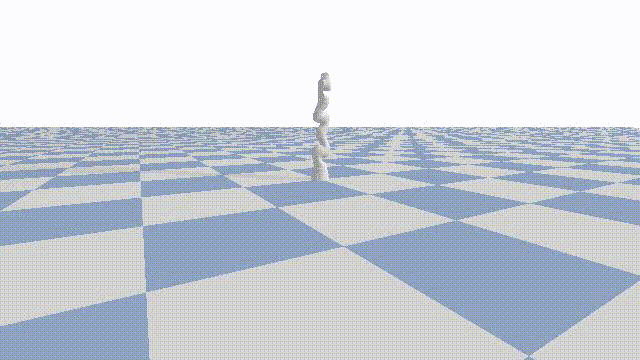

In [ ]:
show_gif_image('./output.gif')

In [ ]:
p.resetSimulation()
planeID = p.loadURDF("plane.urdf")
robot = p.loadURDF("kuka_experimental/kuka_lbr_iiwa_support/urdf/lbr_iiwa_14_r820.urdf", [0,0,0], useFixedBase = 1)
p.setGravity(0, 0, -9.81)
p.setRealTimeSimulation(0) 
#orientetion x,y,z Euler Angles in quaternion form
#orientation 3.14 = 180 degrees around x-axis
Orientation = p.getQuaternionFromEuler([3.14, 0., 0.])
#calculate the position of each joint, calculate inverse kinematics
#I'm gonna use the robot with the seven joints and I'm gonna move it at this
#position and this orientation. Position 0.1 x , 0.1 y e 0.4 z
targetPositionJoints = p.calculateInverseKinematics(robot, 7, [0.2, 0.2, 0.4], targetOrientation = Orientation)
#I get to use the comment set joint motor control array and I move the robot to this position
p.setJointMotorControlArray(robot, range(7), p.POSITION_CONTROL, targetPositions = targetPositionJoints)

In [ ]:
frame = 0
for _ in range(300): #10000
  p.stepSimulation()
  time.sleep(1./10.)
  if _ % 10 == 0:
      _, _, img, _, _ = p.getCameraImage(pixelWidth, pixelHeight, viewMatrix,projectionMatrix, shadow=1, lightDirection=[1,1,1])
      Image.fromarray(img[:, :, :3]).save('./frame%04d.jpg' % frame)
      frame += 1
ffmpeg.input('./frame*.jpg', pattern_type='glob', framerate=30).output('./output.gif').overwrite_output().run()   

(None, None)


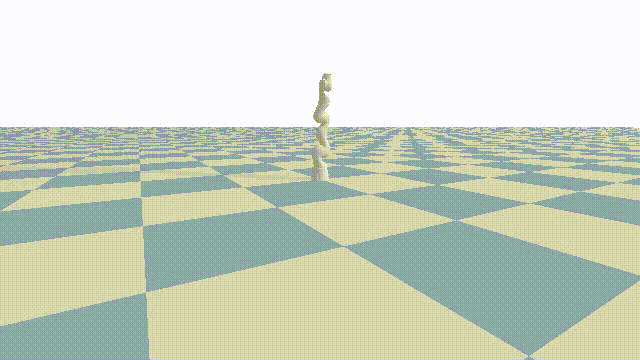

In [ ]:
show_gif_image('./output.gif')

In [ ]:
%%time
camTargetPos = [0, 0, 0]
cameraUp = [0, 0, 1]
cameraPos = [1, 1, 1]
p.setGravity(0, 0, -10)

from google.colab import widgets
import numpy as np
import random
import time
from matplotlib import pylab
grid = widgets.Grid(2, 2)
yaw = 0
for r in range(2):
  for c in range(2):
    yaw += 60
    with grid.output_to(r, c):
      grid.clear_cell()
      pylab.figure(figsize=(10, 5))
      pitch = -10.0
      roll = -50
      upAxisIndex = 2
      camDistance = 2.5
      pixelWidth = 800
      pixelHeight = 600
      nearPlane = 0.01
      farPlane = 100
      fov = 60
      viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                  roll, upAxisIndex)
      aspect = pixelWidth / pixelHeight
      projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)
          
      img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
      w = img_arr[0]  #width of the image, in pixels
      h = img_arr[1]  #height of the image, in pixels
      rgb = img_arr[2]  #color data RGB
      dep = img_arr[3]  #depth data
      print("w=",w,"h=",h)
      np_img_arr = np.reshape(rgb, (h, w, 4))
      np_img_arr = np_img_arr * (1. / 255.)
      pylab.imshow(np_img_arr, interpolation='none', animated=True, label="pybullet")

In [ ]:
%%time
!pip install pybullet
!pip install numpngw
#show video
!apt-get install -y xvfb python-opengl ffmpeg 
!pip install ffmpeg-python

     |████████████████████████████████| 102.2MB 42kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 11 not upgraded.
Need to get 1,280 kB of archives.
After this operation, 7,682 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.7 [783 kB]
Fetched 1,280 kB in 1s (900 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Selecting previously unselected package xvfb.


In [ ]:
import time 
import os
import pybullet as p
import pybullet_data as pd

p.connect(p.DIRECT)
p.setAdditionalSearchPath(pd.getDataPath())
planeID = p.loadURDF("plane.urdf")

In [ ]:

urdf_root_path = pybullet_data.getDataPath()
os.system("git clone https://github.com/araffin/robotics-rl-srl.git")
#https://github.com/araffin/robotics-rl-srl
button = p.loadURDF("robotics-rl-srl/urdf/simple_button.urdf")
tableUid = p.loadURDF(os.path.join(urdfRootPath, "table/table.urdf"),basePosition=[0.5,0,-0.65])
pandaUid = p.loadURDF(os.path.join(pybullet_data.getDataPath(), "franka_panda/panda.urdf"),useFixedBase=True)



NameError: ignored

,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


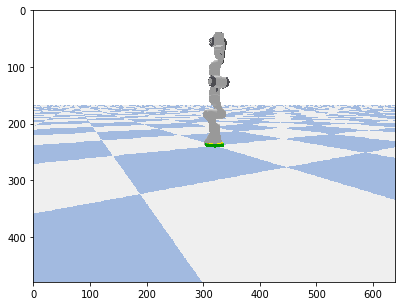

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


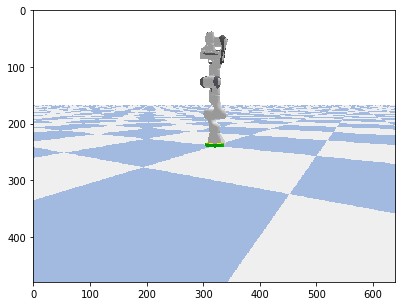

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


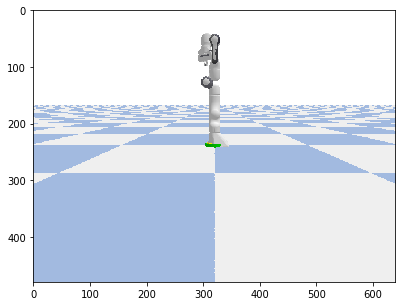

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


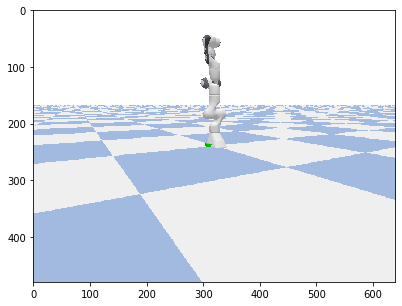

<IPython.core.display.Javascript object>

CPU times: user 1.19 s, sys: 59.5 ms, total: 1.25 s
Wall time: 1.29 s


In [ ]:
%%time
camTargetPos = [0, 0, 0]
cameraUp = [0, 0, 1]
cameraPos = [1, 1, 1]
p.setGravity(0, 0, -10)

from google.colab import widgets
import numpy as np
import random
import time
from matplotlib import pylab
grid = widgets.Grid(2, 2)
yaw = 0
for r in range(2):
  for c in range(2):
    yaw += 60
    with grid.output_to(r, c):
      grid.clear_cell()
      pylab.figure(figsize=(10, 5))
      pitch = -10.0
      roll = 0
      upAxisIndex = 2
      camDistance = 2.5
      pixelWidth = 640
      pixelHeight = 480
      nearPlane = 0.01
      farPlane = 100
      fov = 60
      viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                  roll, upAxisIndex)
      aspect = pixelWidth / pixelHeight
      projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)
          
      img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
      w = img_arr[0]  #width of the image, in pixels
      h = img_arr[1]  #height of the image, in pixels
      rgb = img_arr[2]  #color data RGB
      dep = img_arr[3]  #depth data
      print("w=",w,"h=",h)
      np_img_arr = np.reshape(rgb, (h, w, 4))
      np_img_arr = np_img_arr * (1. / 255.)
      pylab.imshow(np_img_arr, interpolation='none', animated=True, label="pybullet")